<H1 align="center" style="padding-top:20px;color:firebrick"><span style="font-size:30px;"><U><I><B>Assignment - 1 (TSA)</B></I></U></span></H1>

# Importing Data
First, we will import 6 years stock price data of TCS from investing.in from 31/12/2014 to 30/10/2020. After that, we will calculate simple net returns, simple gross returns and continuously compounded returns. I have shown the first 10 rows of the data below:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import investpy

In [2]:
tcs = pd.DataFrame({"Stock Closing Price" :investpy.stocks.get_stock_historical_data(stock="TCS", country="india", 
            from_date="31/12/2014", to_date="30/10/2020", as_json=False, order='ascending', interval='Daily')['Close']})
tcs.index = pd.to_datetime(tcs.index)
tcs['Simple Net Returns'] = tcs['Stock Closing Price'].pct_change()
tcs['Simple Gross Returns'] = tcs['Stock Closing Price'].pct_change() + 1
tcs['Continuously Compounded Returns'] = tcs['Simple Gross Returns'].map(np.log)
tcs.head(10)

,Stock Closing Price,Simple Net Returns,Simple Gross Returns,Continuously Compounded Returns
Date,,,,
2014-12-31,1254.12,NaN,NaN,NaN
2015-01-01,1247.90,-0.004960,0.995040,-0.004972
2015-01-02,1264.51,0.013310,1.013310,0.013223
2015-01-05,1245.30,-0.015192,0.984808,-0.015308
2015-01-06,1199.39,-0.036867,0.963133,-0.037563
2015-01-07,1185.22,-0.011814,0.988186,-0.011885
2015-01-08,1198.02,0.010800,1.010800,0.010742
2015-01-09,1231.60,0.028030,1.028030,0.027644
2015-01-12,1230.32,-0.001039,0.998961,-0.001040


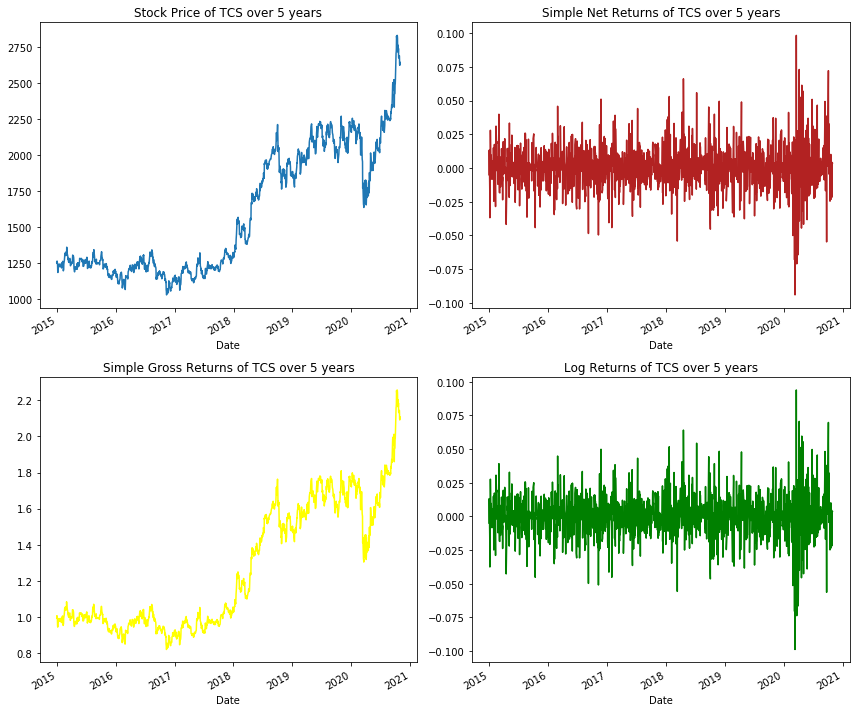

In [3]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
tcs['Stock Closing Price'].plot(kind='line', ax=ax[0, 0], title = "Stock Price of TCS over 5 years")
tcs['Simple Net Returns'].plot(kind='line', ax=ax[0, 1], title = "Simple Net Returns of TCS over 5 years", color = 'firebrick')
tcs['Simple Gross Returns'].cumprod().plot(kind='line', ax=ax[1, 0], title = "Simple Gross Returns of TCS over 5 years", color = "yellow")
tcs['Continuously Compounded Returns'].plot(kind='line', ax=ax[1, 1], title = "Log Returns of TCS over 5 years", color = 'green')
fig.tight_layout()
plt.show()

In [5]:
print("Annual Returns for 2015:", (tcs.loc['2015-01-01':'2015-12-31', 'Simple Gross Returns'].prod() - 1) * 100, "%")
print("Annual Returns for 2016:", (tcs.loc['2016-01-01':'2016-12-31', 'Simple Gross Returns'].prod() - 1) * 100, "%")
print("Annual Returns for 2017:", (tcs.loc['2017-01-01':'2017-12-31', 'Simple Gross Returns'].prod() - 1) * 100, "%")
print("Annual Returns for 2018:", (tcs.loc['2018-01-01':'2018-12-31', 'Simple Gross Returns'].prod() - 1) * 100, "%")
print("Annual Returns for 2019:", (tcs.loc['2019-01-01':'2019-12-31', 'Simple Gross Returns'].prod() - 1) * 100, "%")
print("Annual Returns for 2020 till now:", (tcs.loc['2020-01-01':'2020-10-30', 'Simple Gross Returns'].prod() - 1) * 100, "%")

Annual Returns for 2015: -4.745159952795552 %
Annual Returns for 2016: -2.9256410041771708 %
Annual Returns for 2017: 14.188641498370158 %
Annual Returns for 2018: 40.16387252680869 %
Annual Returns for 2019: 16.46776757091679 %
Annual Returns for 2020 till now: 22.241754174954977 %


# Nifty IT Index

The NIFTY IT index captures the performance of the Indian IT companies. The NIFTY IT Index comprises of 10 companies listed on
the National Stock Exchange (NSE).

The NIFTY IT index is computed using free float market capitalization method with a base date of Jan 1, 1996 indexed to a base value of 1000 wherein the level of the index reflects total free float market value of all the stocks in the index relative to a particular base market capitalization value. The base value of the index was revised from 1000 to 100 with effect from May 28, 2004.

NIFTY IT Index can be used for a variety of purposes such as benchmarking fund portfolios, launching of index funds, ETFs and
structured products.

[Source: NSE Indices (IT)](https://www.niftyindices.com/Factsheet/ind_nifty_it.pdf)

## Sectoral Distribution of the Index

<img src="Sectoral Distribution.png">

## Importing Data of Nifty IT

First 10 rows show the stock prices of Nifty IT over 6 years:

In [13]:
nifty = pd.DataFrame({"Index Closing Price" : investpy.indices.get_index_historical_data(index = "Nifty IT", country="india", 
        from_date="31/12/2014", to_date="30/10/2020", as_json=False, order='ascending', interval='Daily')['Close']})
nifty.index = pd.to_datetime(nifty.index)
nifty['Simple Gross Returns'] = nifty['Index Closing Price'].pct_change() + 1
nifty.head(10)

,Index Closing Price,Simple Gross Returns
Date,,
2014-12-31,11216.30,NaN
2015-01-01,11215.70,0.999947
2015-01-02,11372.10,1.013945
2015-01-05,11248.55,0.989136
2015-01-06,10959.90,0.974339
2015-01-07,10916.00,0.995994
2015-01-08,11018.15,1.009358
2015-01-09,11399.65,1.034625
2015-01-12,11543.65,1.012632


### Comparing TCS Stock with Nifty IT

Now, let's compare TCS stock price as well simple gross returns with those of Nifty IT as shown below:

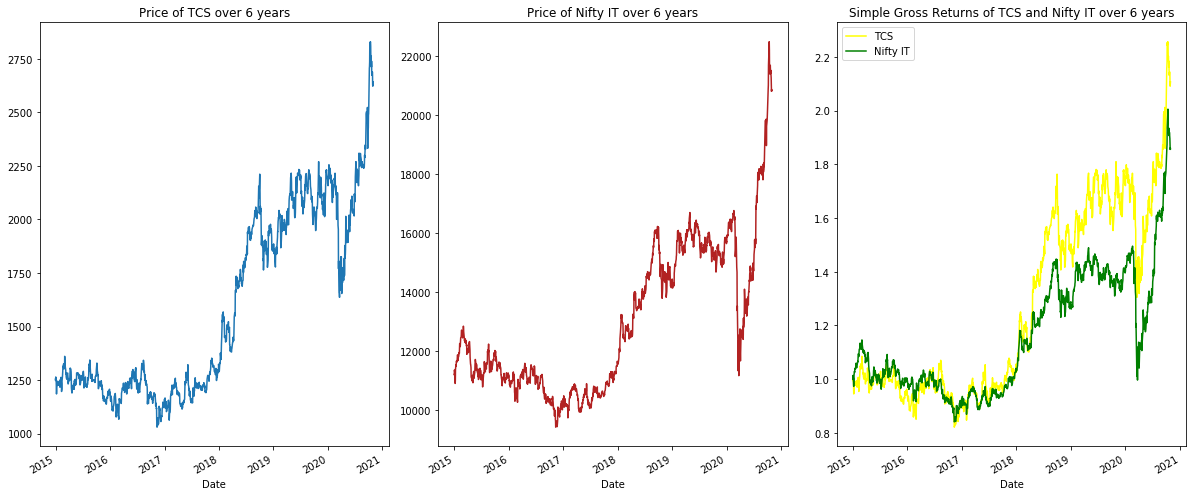

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(17, 7))
tcs['Stock Closing Price'].plot(kind='line', ax=ax[0])
nifty['Index Closing Price'].plot(kind='line', ax=ax[1], color = 'firebrick')
ax[0].set_title("Price of TCS over 6 years")
ax[1].set_title("Price of Nifty IT over 6 years")
tcs['Simple Gross Returns'].cumprod().plot(kind='line', ax=ax[2], title = "Simple Gross Returns of TCS and Nifty IT over 6 years",
                                           color = "yellow")
nifty['Simple Gross Returns'].cumprod().plot(kind='line', ax=ax[2], color = "green")
ax[2].legend(['TCS', 'Nifty IT'])
fig.tight_layout()
plt.show()

#### Observations from above Graphs:

1. TCS stock price move almost in tandem with Nifty IT.
2. From 2018 onwards, TCS stock gave higher returns than Nifty IT index.

# Nifty Commodities

The NIFTY Commodities Index is designed to reflect the behaviour and performance of a diversified portfolio of companies representing the commodities segment which includes sectors like Oil, Petroleum Products, Cement, Power, Chemical, Sugar, Metals and Mining. The NIFTY Commodities Index comprises of 30 companies that are listed on the National Stock Exchange (NSE).

At the time of rebalancing of shares/ change in index constituents/ change in investible weight factors (IWFs), the weightage of the index constituent (where applicable) is capped at 10%. NIFTY Commodities Index can be used for a variety of purposes such as
benchmarking fund portfolios, launching of index funds, ETFs and structured products.

[Source: Nifty Indices (Commodities)](https://www.niftyindices.com/Factsheet/ind_nifty_commodities.pdf)

## Sectoral Distribution of Nifty Commodities

<img src="Sectoral Distribution - Commodities.png">